In [2]:
# csvファイルを作成

import csv
data_list = []
for i in range(1, 5):
    data = [h + str(i) for h in "ABCD"]
    data_list.append(data)

with open("test.csv", mode='w', encoding='utf-8') as f:
    csv_writer = csv.writer(f, lineterminator='\n')
    csv_writer.writerows(data_list)

In [3]:
# csv読込
import pandas as pd
df = pd.read_csv('test.csv', header=None)
print(df, type(df))

    0   1   2   3
0  A1  B1  C1  D1
1  A2  B2  C2  D2
2  A3  B3  C3  D3
3  A4  B4  C4  D4 <class 'pandas.core.frame.DataFrame'>


In [4]:
print(df.values, type(df.values))
print(df.index, type(df.index))
print(df.columns, type(df.columns))

[['A1' 'B1' 'C1' 'D1']
 ['A2' 'B2' 'C2' 'D2']
 ['A3' 'B3' 'C3' 'D3']
 ['A4' 'B4' 'C4' 'D4']] <class 'numpy.ndarray'>
RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'>
Int64Index([0, 1, 2, 3], dtype='int64') <class 'pandas.core.indexes.numeric.Int64Index'>


In [5]:
rows = ['row_0', 'row_1', 'row_2', 'row_3']
cols = ['col_0', 'col_1', 'col_2', 'col_3']
df.index = rows
df.columns = cols
print(df)

      col_0 col_1 col_2 col_3
row_0    A1    B1    C1    D1
row_1    A2    B2    C2    D2
row_2    A3    B3    C3    D3
row_3    A4    B4    C4    D4


In [6]:
df2 = pd.read_csv('test_set.csv', encoding='utf-8')
df2.set_index('row_name', inplace=True)
print(df2)

         col_0 col_1 col_2 col_3
row_name                        
row_0       A1    B1    C1    D1
row_1       A2    B2    C2    D2
row_2       A3    B3    C3    D3
row_3       A4    B4    C4    D4


In [7]:
df2 = df2.reset_index()
print(df2)

  row_name col_0 col_1 col_2 col_3
0    row_0    A1    B1    C1    D1
1    row_1    A2    B2    C2    D2
2    row_2    A3    B3    C3    D3
3    row_3    A4    B4    C4    D4


In [8]:
print("index 行名\n{0}".format(df.index))
print("columns 列名\n{0}".format(df.columns))
print("len() 行数\n{0}".format(len(df)))
print("len(columns) 列数\n{0}".format(len(df.columns)))
print("shape 行列数\n{0}".format(df.shape))
print("size 要素数\n{0}".format(df.size))
print("memory_usage() メモリ使用量\n{0}".format(df.memory_usage()))

index 行名
Index(['row_0', 'row_1', 'row_2', 'row_3'], dtype='object')
columns 列名
Index(['col_0', 'col_1', 'col_2', 'col_3'], dtype='object')
len() 行数
4
len(columns) 列数
4
shape 行列数
(4, 4)
size 要素数
16
memory_usage() メモリ使用量
Index    32
col_0    32
col_1    32
col_2    32
col_3    32
dtype: int64


In [9]:
print(df)

print(df.at['row_2', 'col_2']) # at(row, col)
print(df.loc['row_1', 'col_1']) # loc(row, col)

print(df.iat[2, 2]) # iat(row, col)
print(df.iloc[1, 1]) # iloc(row, col)

      col_0 col_1 col_2 col_3
row_0    A1    B1    C1    D1
row_1    A2    B2    C2    D2
row_2    A3    B3    C3    D3
row_3    A4    B4    C4    D4
C3
B2
C3
B2


In [10]:
print(df.loc[:, 'col_0'])
print(df.loc['row_3', :])

print(df.loc[['row_1', 'row_2'], 'col_1':'col_3'])
print(df.iloc[1:3, 1:3])

row_0    A1
row_1    A2
row_2    A3
row_3    A4
Name: col_0, dtype: object
col_0    A4
col_1    B4
col_2    C4
col_3    D4
Name: row_3, dtype: object
      col_1 col_2 col_3
row_1    B2    C2    D2
row_2    B3    C3    D3
      col_1 col_2
row_1    B2    C2
row_2    B3    C3


In [11]:
print(df.iloc[2], type(df.iloc[2]))
print(df.iloc[:, 2], type(df.iloc[:, 2]))
print(df.iloc[:, 1:3], type(df.iloc[:, 1:3]))

col_0    A3
col_1    B3
col_2    C3
col_3    D3
Name: row_2, dtype: object <class 'pandas.core.series.Series'>
row_0    C1
row_1    C2
row_2    C3
row_3    C4
Name: col_2, dtype: object <class 'pandas.core.series.Series'>
      col_1 col_2
row_0    B1    C1
row_1    B2    C2
row_2    B3    C3
row_3    B4    C4 <class 'pandas.core.frame.DataFrame'>


In [12]:
df.at['row_3', 'col_3'] = "X9"
df.loc[['row_0', 'row_1'], 'col_1'] = "Y8"
df.loc[['row_1', 'row_2'], 'col_2'] = ["Z6", "Z7"]
df.loc[['row_2', 'row_3'], ['col_0', 'col_1']] = [["W5", "W6"], ["W7", "W8"]]
print(df)

      col_0 col_1 col_2 col_3
row_0    A1    Y8    C1    D1
row_1    A2    Y8    Z6    D2
row_2    W5    W6    Z7    D3
row_3    W7    W8    C4    X9


In [13]:
# empty dataframe
cols = ['id', 'name', 'age']
df = pd.DataFrame(columns = cols)
df.set_index('id', inplace=True)
# df = df.append({'id': 1, 'name': 'John', 'age': 30}, ignore_index=True)
# pd.concat(df, pd.DataFrame({'id': 1, 'name': 'John', 'age': 30}, ignore_index=True))
for i in range(1, 5):
    df.loc[i] = ['John' + str(i), i*10]   
print(df)

     name  age
id            
1   John1   10
2   John2   20
3   John3   30
4   John4   40


In [14]:
df = pd.read_csv('test_set.csv', encoding='utf-8')
df.set_index('row_name', inplace=True)
print(df)
print(df.loc[df['col_0'].str.endswith('3'), 'col_1':'col_3']) # 条件指定
print(df.loc[df['col_0'].isin(['A1', 'A3']), 'col_1':'col_3'])

         col_0 col_1 col_2 col_3
row_name                        
row_0       A1    B1    C1    D1
row_1       A2    B2    C2    D2
row_2       A3    B3    C3    D3
row_3       A4    B4    C4    D4
         col_1 col_2 col_3
row_name                  
row_2       B3    C3    D3
         col_1 col_2 col_3
row_name                  
row_0       B1    C1    D1
row_2       B3    C3    D3


In [15]:
df = pd.read_csv('pandas_train_mini.csv', index_col=0)
df.head()

,Satisfied,Pclass,Sex,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,male,"Sato, Mr. Ren",21.0,1,0,A/5 211711,870.000,NaN,Tokyo
2,1,1,female,"Suzuki, Mrs. Himari",37.0,1,0,PC 175991,8553.996,C85,Osaka
3,1,3,female,"Tanaka, Miss. Mei",25.0,0,0,STON/O2. 31012821,951.000,NaN,NaN
4,1,1,female,"Ito, Mrs. Riko",34.0,1,0,227606,6372.000,C123,Tokyo
5,0,3,male,"Takahashi, Mr. Haruto",34.0,0,0,746900,966.000,NaN,Tokyo


In [16]:
print(df.loc[(df['Embarked']=='Tokyo')&(df['Age'] >= 30), 'Satisfied':'Age'])

             Satisfied  Pclass     Sex                   Name   Age
PassengerId                                                        
4                    1       1  female         Ito, Mrs. Riko  34.0
5                    0       3    male  Takahashi, Mr. Haruto  34.0
7                    0       1    male   Yamamoto, Mr. Itsuki  53.0
14                   0       3    male  Yamaguchi, Mr. Hiroto  38.0
16                   1       2  female     Inoue, Mrs. Kotone  54.0
19                   0       3  female        Saito, Mrs.Hina  30.0


In [18]:
df_satisfied = df.loc[df['Satisfied']==1, 'Satisfied':'Age']
print(df_satisfied)

             Satisfied  Pclass     Sex                   Name   Age
PassengerId                                                        
2                    1       1  female    Suzuki, Mrs. Himari  37.0
3                    1       3  female      Tanaka, Miss. Mei  25.0
4                    1       1  female         Ito, Mrs. Riko  34.0
9                    1       3  female    Kobayashi, Mrs. Aoi  26.0
10                   1       2  female         Kato, Mrs. Mio  13.0
11                   1       3  female   Yoshida, Miss. Yuina   3.0
12                   1       1  female      Yamada, Miss. Rin  57.0
16                   1       2  female     Inoue, Mrs. Kotone  54.0
18                   1       2    male       Hayashi, Mr. Aoi   NaN
20                   1       3  female  Shimizu, Mrs. Tsumugi   NaN


In [22]:
df_satisfied = df.query('Satisfied == 1 and Age >= 30')
print(df_satisfied[['Satisfied', 'Name', 'Age']])

             Satisfied                 Name   Age
PassengerId                                      
2                    1  Suzuki, Mrs. Himari  37.0
4                    1       Ito, Mrs. Riko  34.0
12                   1    Yamada, Miss. Rin  57.0
16                   1   Inoue, Mrs. Kotone  54.0


In [25]:
print(df_satisfied.sort_values(by=['Pclass', 'Age'], ascending=[True, False]))

             Satisfied  Pclass     Sex                 Name   Age  SibSp  \
PassengerId                                                                
12                   1       1  female    Yamada, Miss. Rin  57.0      0   
2                    1       1  female  Suzuki, Mrs. Himari  37.0      1   
4                    1       1  female       Ito, Mrs. Riko  34.0      1   
16                   1       2  female   Inoue, Mrs. Kotone  54.0      0   

             Parch     Ticket      Fare Cabin Embarked  
PassengerId                                             
12               0     227566  3186.000  C103      NaN  
2                0  PC 175991  8553.996   C85    Osaka  
4                0     227606  6372.000  C123    Tokyo  
16               0     497412  1920.000   NaN    Tokyo  


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import random

month_num=12
store_num=5
num_list = [[random.randint(1000,10000) \
             for i in range(1, store_num + 1)] \
                for n in range(1, month_num + 1)]
print(num_list)

col_list = ['store' + str(i) for i in range(1, store_num + 1)]
row_list = ['month' + str(i) for i in range(1, month_num + 1)]
df = pd.DataFrame(num_list, columns=col_list, index=row_list)
print(df)

[[8642, 6103, 8988, 6888, 7889], [6088, 5896, 5673, 5005, 3926], [4598, 4636, 1857, 7946, 1367], [1502, 1173, 6404, 7661, 3537], [2291, 7353, 6344, 3282, 5967], [3347, 1063, 9513, 8587, 9898], [5217, 6001, 4109, 2333, 8046], [1897, 4287, 5586, 9829, 1654], [1418, 3055, 4226, 3015, 2084], [2036, 8926, 2049, 8476, 9048], [4491, 8410, 9106, 2715, 7240], [9465, 2824, 8026, 9965, 7125]]
         store1  store2  store3  store4  store5
month1     8642    6103    8988    6888    7889
month2     6088    5896    5673    5005    3926
month3     4598    4636    1857    7946    1367
month4     1502    1173    6404    7661    3537
month5     2291    7353    6344    3282    5967
month6     3347    1063    9513    8587    9898
month7     5217    6001    4109    2333    8046
month8     1897    4287    5586    9829    1654
month9     1418    3055    4226    3015    2084
month10    2036    8926    2049    8476    9048
month11    4491    8410    9106    2715    7240
month12    9465    2824    8026    9965

In [31]:
df.plot()
plt.savefig("figure_save.png")
plt.close()

<AxesSubplot: title={'center': 'monthly sales'}>

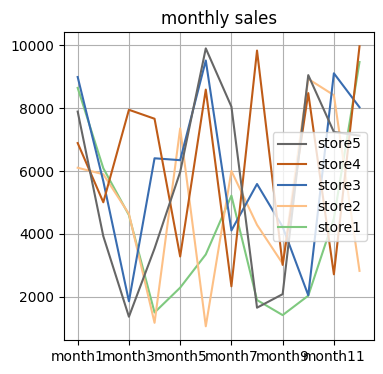

In [37]:
df.plot(title='monthly sales', figsize=(4, 4), grid=True, colormap='Accent', legend='reverse')

<AxesSubplot: >

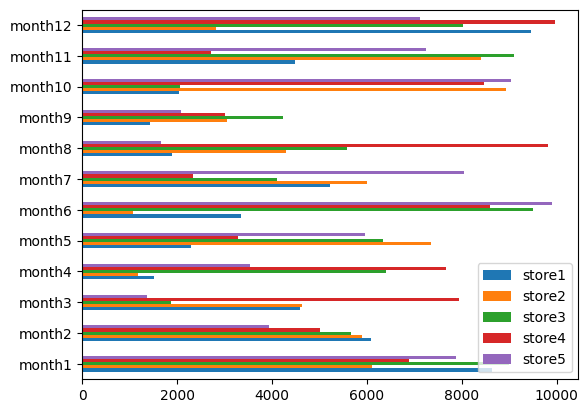

In [39]:
df.plot(kind='barh')

<AxesSubplot: ylabel='store3'>

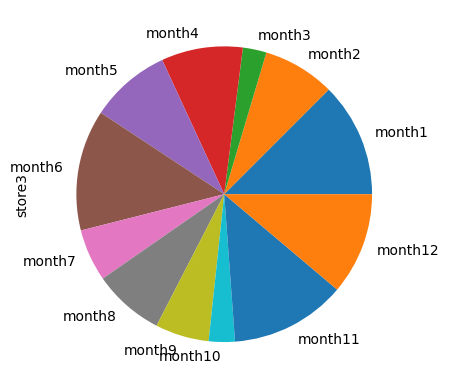

In [40]:
df['store3'].plot(kind='pie')

<AxesSubplot: >

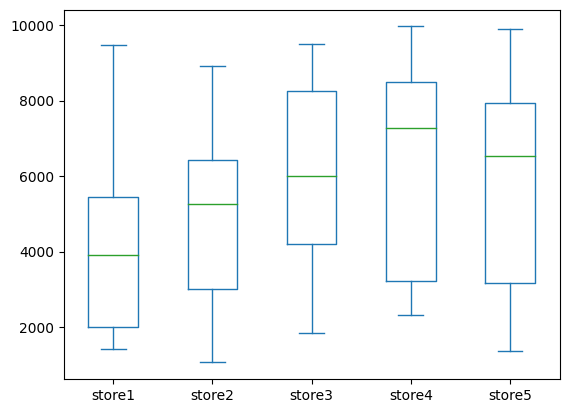

In [42]:
df.plot(kind='box')